File to train the CNN on the virtual machine on the whole dataset.

In [6]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from utils.dataset import CocoDataset
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import CNN, save_model, load_model
from utils.metrics import evaluate_model
from utils.training import train_cnn

device = "cuda" if torch.cuda.is_available() else "cpu"
height, width = 256, 256
path_vm = "/home/default/coco/train/"
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])
dataset = CocoDataset(root=path_vm, transform=transform)
NUM_EPOCHS = 20

Found 82783 images.


In [2]:
torch.manual_seed(42)
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train, test = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

# MSE Loss

In [3]:
torch.manual_seed(42)
model = CNN(height, width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion1 = nn.MSELoss()

In [4]:
torch.manual_seed(42)
train_losses_mse, test_losses_mse = train_cnn(NUM_EPOCHS, model, criterion1, optimizer, train_loader, test_loader, device,
                                              save_losses=True, save_checkpoints=True, file_name="cnn_mse")

Testing: 100%|██████████| 259/259 [06:21<00:00,  1.47s/it]


Epoch 1, Train Loss: 0.0035013593773802983, Validation Loss: 0.003261141656110473


Testing: 100%|██████████| 259/259 [06:03<00:00,  1.40s/it]


Epoch 2, Train Loss: 0.003188323486564852, Validation Loss: 0.0031302761157046876


Testing: 100%|██████████| 259/259 [06:04<00:00,  1.41s/it]


Epoch 3, Train Loss: 0.0030769774564294423, Validation Loss: 0.0030740065892086756


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 4, Train Loss: 0.0030219103238918786, Validation Loss: 0.0030720697016487597


Testing: 100%|██████████| 259/259 [05:54<00:00,  1.37s/it]


Epoch 5, Train Loss: 0.002962971617049281, Validation Loss: 0.003097362529565526


Testing: 100%|██████████| 259/259 [05:56<00:00,  1.38s/it]


Epoch 6, Train Loss: 0.0028957318151279707, Validation Loss: 0.0031269533005920617


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.36s/it]


Epoch 7, Train Loss: 0.0028215330440533046, Validation Loss: 0.0031809144083439268


Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 8, Train Loss: 0.0027435675355637276, Validation Loss: 0.0031949138991592243


Testing: 100%|██████████| 259/259 [05:43<00:00,  1.33s/it]


Epoch 9, Train Loss: 0.0026687330167047716, Validation Loss: 0.0032077915175425962


Testing: 100%|██████████| 259/259 [05:52<00:00,  1.36s/it]


Epoch 10, Train Loss: 0.002609448040979532, Validation Loss: 0.0032564426491820905
Model saved to models/cnn_mse_10.pth successfully!


Testing: 100%|██████████| 259/259 [05:54<00:00,  1.37s/it]


Epoch 11, Train Loss: 0.0025656810535369936, Validation Loss: 0.0032723002993361484


Testing: 100%|██████████| 259/259 [05:47<00:00,  1.34s/it]


Epoch 12, Train Loss: 0.002529456525600115, Validation Loss: 0.0032833943819504906


Testing: 100%|██████████| 259/259 [05:48<00:00,  1.35s/it]


Epoch 13, Train Loss: 0.0024979736831417117, Validation Loss: 0.0033421504030788037


Testing: 100%|██████████| 259/259 [05:50<00:00,  1.35s/it]


Epoch 14, Train Loss: 0.002476568107160285, Validation Loss: 0.0032993460651199445


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.37s/it]


Epoch 15, Train Loss: 0.0024518738968684764, Validation Loss: 0.003333675008065797


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.37s/it]


Epoch 16, Train Loss: 0.002434706134532673, Validation Loss: 0.003330254111021872


Testing: 100%|██████████| 259/259 [05:49<00:00,  1.35s/it]


Epoch 17, Train Loss: 0.002416881167437827, Validation Loss: 0.0033844690302451603


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 18, Train Loss: 0.0023984385821923327, Validation Loss: 0.003371881306689218


Testing: 100%|██████████| 259/259 [05:24<00:00,  1.25s/it]


Epoch 19, Train Loss: 0.0023833465876039748, Validation Loss: 0.0033810272341788274


Epoch 20/30:  61%|██████    | 629/1035 [13:11<09:27,  1.40s/it]Bad pipe message: %s [b"\x1d\xb7\xb4S\xc4\xbc;\xc9\xb5\x9e\xdc0\xaa\xcc\xb2)2E \x13\x04\xc2\xc9\xe0\x99\x148iP\xb2\xdf'\xb5.\xea\tff\xc6\xb8j\x91\xa1q\xe5<O\x0bVD\x1f\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e"]
Bad pipe message: %s [b"d\xda\xf3\xb4\xf7\x99\x88\xb1\xea\x8d\x1a\xb9\x15\xa1\x98\xfc\x83m\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x00", b'\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x0

Epoch 20, Train Loss: 0.002371850628900715, Validation Loss: 0.003415857475883827
Model saved to models/cnn_mse_20.pth successfully!


Epoch 21/30:   4%|▎         | 38/1035 [00:47<20:53,  1.26s/it]


KeyboardInterrupt: 

In [8]:
model = load_model(CNN(height, width), "models/cnn_mse_20.pth").to(device)

CNN model loaded successfully!


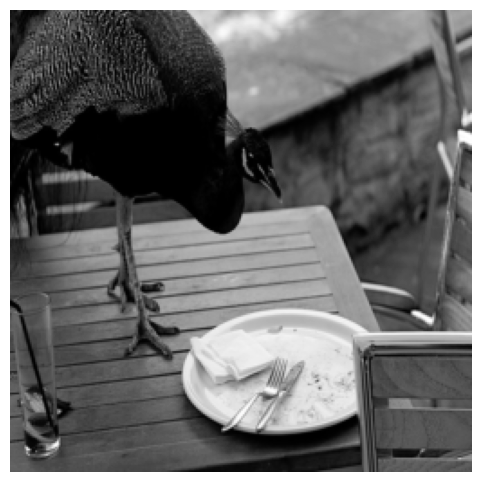

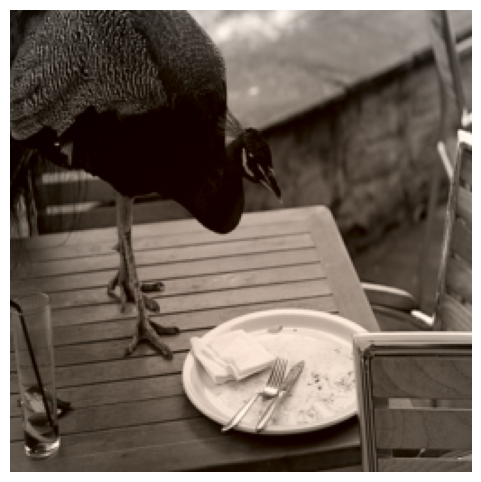

In [9]:
# plot_losses(train_losses_mse, test_losses_mse)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# L1 Loss

In [ ]:
torch.manual_seed(42)
model = CNN(height, width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion2 = nn.L1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1, test_losses_l1 = train_cnn(NUM_EPOCHS, model, criterion2, optimizer, train_loader, test_loader, device,
                                            save_losses=True, save_checkpoints=True, file_name="cnn_l1")

In [ ]:
save_model(model, "cnn_l1_trained")

In [ ]:
plot_losses(train_losses_l1, test_losses_l1)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# L1 Smooth

In [ ]:
torch.manual_seed(42)
model = CNN(height, width).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion3 = nn.SmoothL1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1smooth, test_losses_l1smooth = train_cnn(NUM_EPOCHS, model, criterion3, optimizer, train_loader, test_loader, device,
                                                        save_losses=True, save_checkpoints=True, file_name="cnn_l1smooth")

In [ ]:
save_model(model, "cnn_l1smooth_trained")

In [ ]:
plot_losses(train_losses_l1smooth, test_losses_l1smooth)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")